<a href="https://colab.research.google.com/github/ShubhamSBhat/Bengaluru-Restaurants-Analysis/blob/main/Ratings_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:

df=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [38]:
# Dropping columns 'url', 'address' and 'phone'  as they are not much relevant for analysis.

df.drop(['url', 'address', 'phone',], axis=1, inplace=True)

In [39]:
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [40]:
dishes_df = df[df.dish_liked.notnull()]
dishes_df.dish_liked = dishes_df.dish_liked.apply(lambda x:x.lower().strip())

In [41]:
dishes_df.isnull().sum()

name                 0
online_order         0
book_table           0
rate                30
votes                0
location             0
rest_type           70
dish_liked           0
cuisines             0
average_cost       136
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
dtype: int64

In [42]:
dish_count = []
for i in dishes_df.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [43]:
cuisines_df = df[df.cuisines.notnull()]
cuisines_df.cuisines = cuisines_df.cuisines.apply(lambda x:x.lower().strip())

In [44]:
cuisines_count= []

for i in cuisines_df.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

In [45]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [46]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

In [47]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)

In [48]:
df= df.dropna()

In [49]:
df1 = df
df1.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [50]:
df1['rest_type'] = df1['rest_type'].str.replace(',' , '') 
df1['rest_type'] = df1['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df1['rest_type'].value_counts().head()

Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [51]:
df1['cuisines'] = df1['cuisines'].str.replace(',' , '') 
df1['cuisines'] = df1['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df1['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [52]:

T = LabelEncoder()                 
df1['location'] = T.fit_transform(df1['location'])
df1['rest_type'] = T.fit_transform(df1['rest_type'])
df1['cuisines'] = T.fit_transform(df1['cuisines'])

In [53]:
df1["average_cost"] = df1["average_cost"].str.replace(',' , '') 

In [54]:
df1["average_cost"] = df1["average_cost"].astype('float')

In [55]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_in(city)
0,Jalsa,1,1,4.1,775,1,29,951,800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0,Banashankari
4,Grand Village,0,0,3.8,166,4,29,1237,600.0,Banashankari


In [56]:
x = df1.drop(['rate','name','listed_in(city)'],axis = 1)
y = df1['rate']
x.shape

(23259, 7)

In [57]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
0,1,1,775,1,29,951,800.0
1,1,0,787,1,29,963,800.0
2,1,0,918,1,22,806,800.0
3,0,0,88,1,19,1201,300.0
4,0,0,166,4,29,1237,600.0


In [58]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 25)

In [59]:

num_values1=df1.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df1[num_values1])
df1[num_values1]=scaler.transform(df1[num_values1])

In [60]:
df1.shape

(23259, 10)

In [61]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_in(city)
0,Jalsa,1,1,0.455722,0.152328,-1.484286,0.439629,0.511472,0.089176,Banashankari
1,Spice Elephant,1,0,0.455722,0.163105,-1.484286,0.439629,0.544855,0.089176,Banashankari
2,San Churro Cafe,1,0,-0.248401,0.280757,-1.484286,-0.260339,0.108097,0.089176,Banashankari
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,-1.484286,-0.560325,1.206945,-0.871467,Banashankari
4,Grand Village,0,0,-0.248401,-0.394616,-1.355312,0.439629,1.307094,-0.295081,Banashankari


In [62]:
 
dc =  DecisionTreeRegressor()
dc.fit(X_train,y_train)
y_pred_rfr = dc.predict(X_test)

In [63]:
dc.score(X_test,y_test)*100

88.34698552145403

In [64]:

train_X, test_X, train_y,test_y = train_test_split(x,y,test_size=0.3)
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [65]:

#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.2141225673400794
Mean Squared Error :  0.8002635964196194


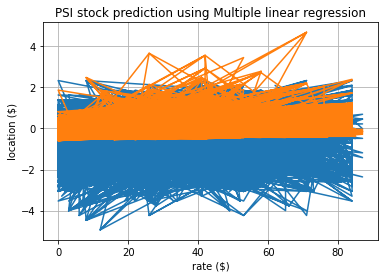

In [66]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='rate ($)',ylabel='location ($)', title='PSI stock prediction using Multiple linear regression')
ax.plot(test_X['location'],test_y)
ax.plot(test_X['location'],predict_y)
fig.savefig('LRPlot.png')
plt.show()

In [67]:

  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(train_X, train_y) 

RandomForestRegressor(random_state=0)

In [68]:
regressor.score(test_X,test_y)

0.9179166382453837